# Customer Churn Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## EDA

In [2]:
churn_df = pd.read_csv("data/train.csv")

In [3]:
churn_df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [4]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [5]:
#checking for Null values
churn_df.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [6]:
# area code - replacing string area_code_ for nothing and converting into interger
churn_df["area_code"].unique()
churn_df ["area_code"] = churn_df["area_code"].loc[:].str.replace("area_code_", "")

In [7]:
churn_df["area_code"].unique()

array(['415', '408', '510'], dtype=object)

In [8]:
churn_df["area_code"] = churn_df["area_code"].astype("int")

In [9]:
# checking values in each object column

In [10]:
churn_df["international_plan"].unique()

array(['no', 'yes'], dtype=object)

In [11]:
churn_df["voice_mail_plan"].unique()

array(['yes', 'no'], dtype=object)

In [12]:
churn_df["churn"].unique()

array(['no', 'yes'], dtype=object)

In [13]:
# converting churn yes and no to 0 and 1
churn_df.loc[(churn_df["churn"] == "no"), "churn"] = 0
churn_df.loc[(churn_df["churn"] == "yes"), "churn"] = 1
churn_df["churn"] = churn_df["churn"].astype(int)

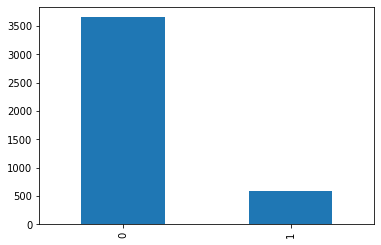

In [14]:
# proportion of churn and no churn
churn_df["churn"].value_counts().plot(kind = "bar")

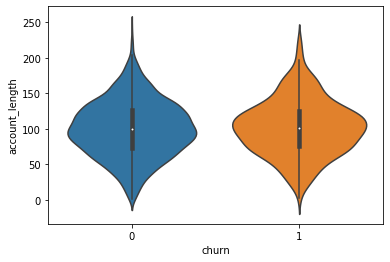

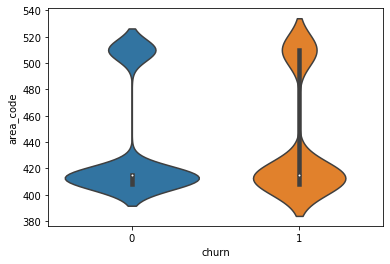

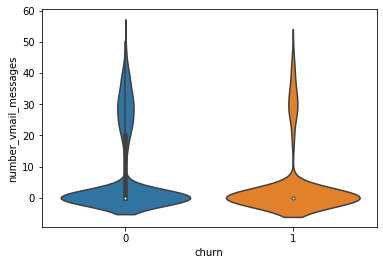

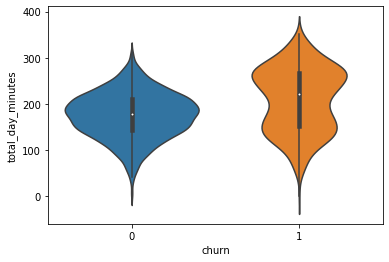

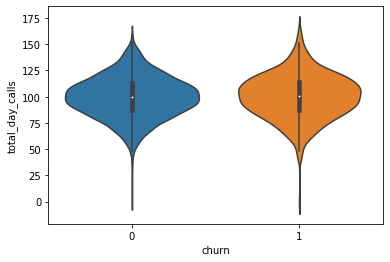

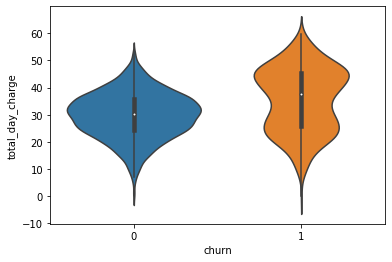

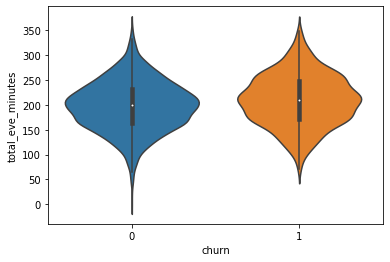

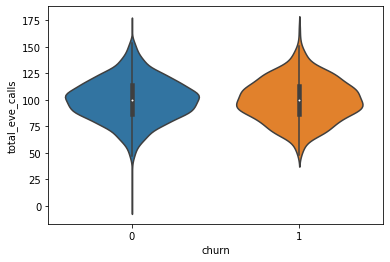

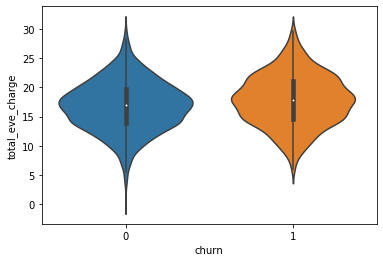

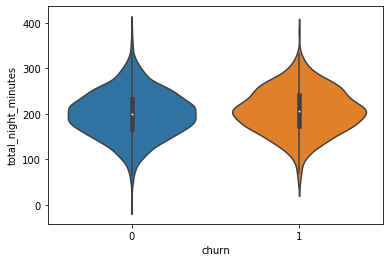

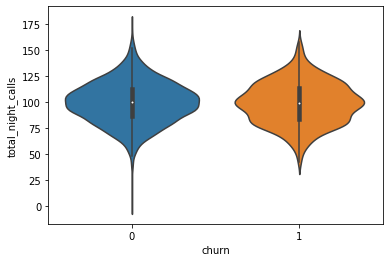

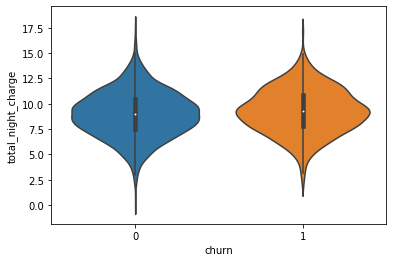

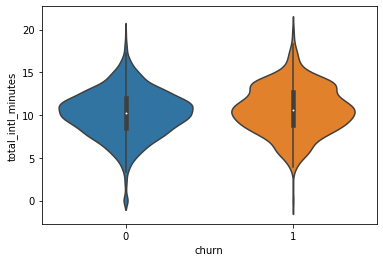

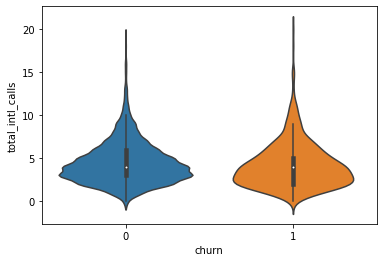

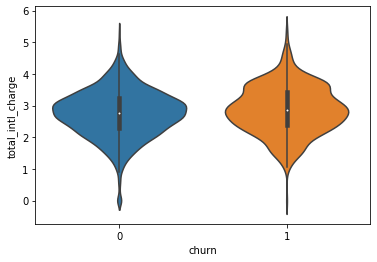

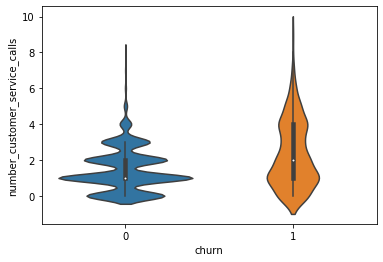

In [15]:
# violin plot to check data distribution per churn and no churn
list_col = ['account_length', 'area_code', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls']
for col in list_col:
    plt.figure()
    ax = sns.violinplot(x="churn", y=churn_df[col], data=churn_df)

In [16]:
# correlation between total_day_minutes and total_day_charge, also evening,night and int 

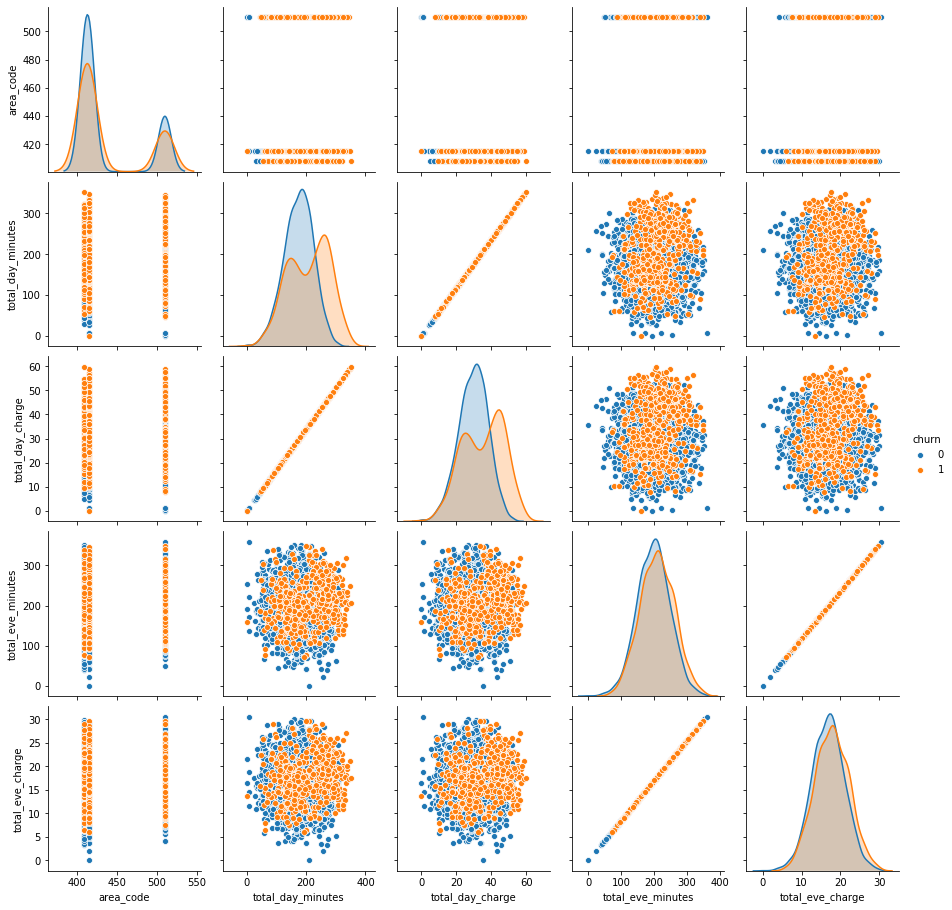

In [17]:
# plotting the columns that seems to have different distributions relating to churn
g = sns.pairplot(churn_df, vars = ['area_code','total_day_minutes','total_day_charge','total_eve_minutes','total_eve_charge'], hue ="churn")

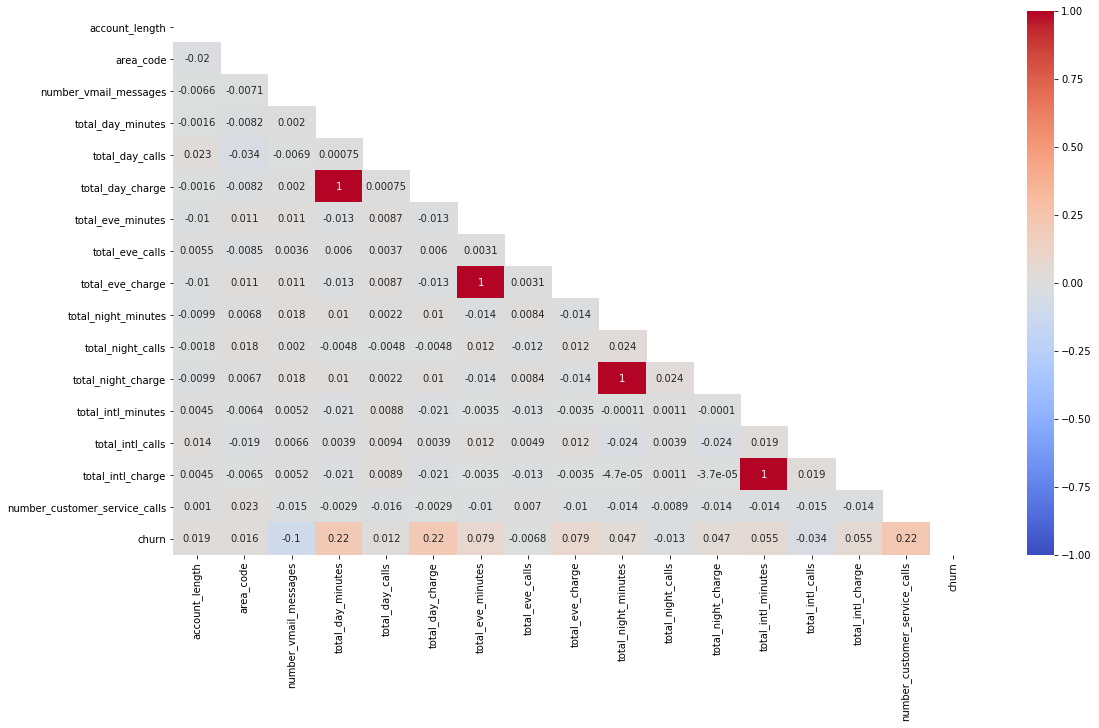

In [18]:
# checking correlation
plt.figure(figsize = (18.0,10.0))
matrix = np.triu(churn_df.corr())
sns.heatmap(churn_df.corr(), annot=True, mask=matrix, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.show()
# as we can see total_day_minutes and total_day_charge are correlated
#also evening,night and international minutes and charges

In [19]:
# creating dummies for state, international plan and voice mail plan
df_model = pd.get_dummies(churn_df[["state", "international_plan", "voice_mail_plan"]],drop_first = True)

In [20]:
df_model.head()

,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international_plan_yes,voice_mail_plan_yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
df_model.shape

(4250, 52)

In [22]:
# concat churn and df_model
df_model = pd.concat([churn_df,df_model], axis = 1)

In [23]:
df_model.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international_plan_yes,voice_mail_plan_yes
0,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,0,0,0,0,0,0,0,0,0,1
1,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,0,0,0,0,0,0,0,0,0,0
2,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,0,0,0,0,0,0,0,0,1,0
3,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,0,0,0,0,0,0,0,0,1,0
4,MA,121,510,no,yes,24,218.2,88,37.09,348.5,...,0,0,0,0,0,0,0,0,0,1


In [24]:
churn = churn_df["churn"] 

In [25]:
# droping object columns
col_drop = ["state", "international_plan","voice_mail_plan","churn"]
for col in col_drop:
    df_model = df_model.drop(col, axis = 1)

In [26]:
df_model.shape

(4250, 68)

In [27]:
df_model["churn"] = churn

## Modeling 

- since we saw some columns are correlated to each other, I will check how the model would perform with and without those columns

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [29]:
# splitting the data
X = df_model.iloc[:,:-1]
y = df_model.iloc[:,-1]
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [30]:
X_train.shape

(3400, 68)

In [31]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

C:\Users\gisel\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
#  Score model
print(f'Score on train: {LR_model.score(X_train, y_train)}')
print(f'Score on test: {LR_model.score(X_test, y_test)}')

Score on train: 0.8614705882352941
Score on test: 0.86


In [33]:
y_pred = LR_model.predict(X_test)

from sklearn.metrics import confusion_matrix

con_mat = confusion_matrix(y_test,y_pred)
con_mat

array([[717,  15],
       [104,  14]], dtype=int64)

In [34]:

df_con_mat = pd.DataFrame(con_mat, columns = ['Predicted 0','Predicted 1'],
                 index = ['True 0','True 1'])

df_con_mat
# it seems the model is not able to predict churn

,Predicted 0,Predicted 1
True 0,717,15
True 1,104,14


In [35]:
# grab the coefficients from log
coef_dict = {}
for coef, feat in zip(LR_model.coef_[0,:],X_train.columns):
    coef_dict[feat] = coef

In [36]:
coefficients = pd.DataFrame.from_dict(coef_dict,orient='index')
coefficients = coefficients.reset_index()
coefficients.columns = ["Feature", "Coefficient"]
coefficients.sort_values(by = "Coefficient", ascending = False)

,Feature,Coefficient
15,number_customer_service_calls,0.498739
66,international_plan_yes,0.237780
12,total_intl_minutes,0.043212
46,state_NJ,0.022418
62,state_WA,0.018652
...,...,...
54,state_RI,-0.015674
26,state_HI,-0.016352
2,number_vmail_messages,-0.023979
67,voice_mail_plan_yes,-0.024615


In [37]:
coefficients["likelihood"] = np.exp(coefficients["Coefficient"])

In [38]:
# take the exp of the coefficients to find the likelihood
coefficients = coefficients.sort_values(by = "Coefficient", ascending = False)
coefficients.head(10)
# for every 1 increase in the number of vmail messages, it increases the likelihood of churn in 1.58 times
# for every increase in the number of customer service calls, increase the likelihood of churn in 1.21 times

,Feature,Coefficient,likelihood
15,number_customer_service_calls,0.498739,1.646643
66,international_plan_yes,0.237780,1.268430
12,total_intl_minutes,0.043212,1.044159
46,state_NJ,0.022418,1.022671
62,state_WA,0.018652,1.018827
41,state_MT,0.018549,1.018722
19,state_CA,0.014255,1.014357
40,state_MS,0.012558,1.012637
58,state_TX,0.012267,1.012342
14,total_intl_charge,0.011575,1.011642


- Deleting the correlated columns

In [39]:
col_drop = ['total_day_charge','total_eve_charge','total_night_charge','total_intl_charge']
df_clean= df_model.copy()
for col in col_drop:
    df_clean = df_clean.drop(col,axis = 1)

In [40]:
df_clean.shape

(4250, 65)

In [41]:
# splitting the data
X = df_clean.iloc[:,:-1]
y = df_clean.iloc[:,-1]
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [42]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

C:\Users\gisel\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
#  Score model
print(f'Score on train: {LR_model.score(X_train, y_train)}')
print(f'Score on test: {LR_model.score(X_test, y_test)}')

Score on train: 0.8547058823529412
Score on test: 0.888235294117647


In [44]:
y_pred = LR_model.predict(X_test)

from sklearn.metrics import confusion_matrix

con_mat = confusion_matrix(y_test,y_pred)
con_mat

array([[743,   9],
       [ 86,  12]], dtype=int64)

In [45]:
# Model still can't predict churn

In [46]:
# Comparing few models and checking performance

In [47]:
# splitting the data
X = df_model.iloc[:,:-1]
y = df_model.iloc[:,-1]
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [48]:
import re
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [98]:
# non-esemble models
num_folds = 10
seed = 7
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('decision_tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', svm.SVC()))

              
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s %f  " % (name, cv_results.mean())
    print(msg)
    
    
import warnings
warnings.filterwarnings('ignore')


LR 0.860588  
decision_tree 0.916176  
KNN 0.881765  
SVM 0.859706  


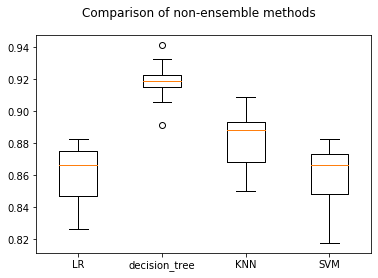

In [50]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Comparison of non-ensemble methods')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show();

In [51]:
#Tunning the decision tree
max_depth= [1,2,3,4,5,6,7,8,9,10,11]
criterion = ["gini", "entropy"]
min_samples_split = [1,2,5,10,50,100,200,300]
param_grid = dict(max_depth=max_depth,criterion = criterion, min_samples_split = min_samples_split)
model = DecisionTreeClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring = scoring, cv=kfold)
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print(f'test score is :  {grid_result.score(X_test, y_test)}')

Best: 0.949118 using {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 2}
test score is :  0.9529411764705882


In [52]:
best_grid = grid_result.best_estimator_
predictions = best_grid.predict(X_test)

In [53]:
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       729
           1       0.88      0.78      0.82       121

    accuracy                           0.95       850
   macro avg       0.92      0.88      0.90       850
weighted avg       0.95      0.95      0.95       850



In [54]:
# Report the confusion matrix
confusion_matrix1 = metrics.confusion_matrix(y_test,predictions)

In [55]:
matrix = pd.DataFrame(confusion_matrix1, columns = ["Pred 0", "Pred 1"], index = ["True 0", "True 1"])
matrix
# decision tree is doing a better job at predicting churn

,Pred 0,Pred 1
True 0,716,13
True 1,27,94


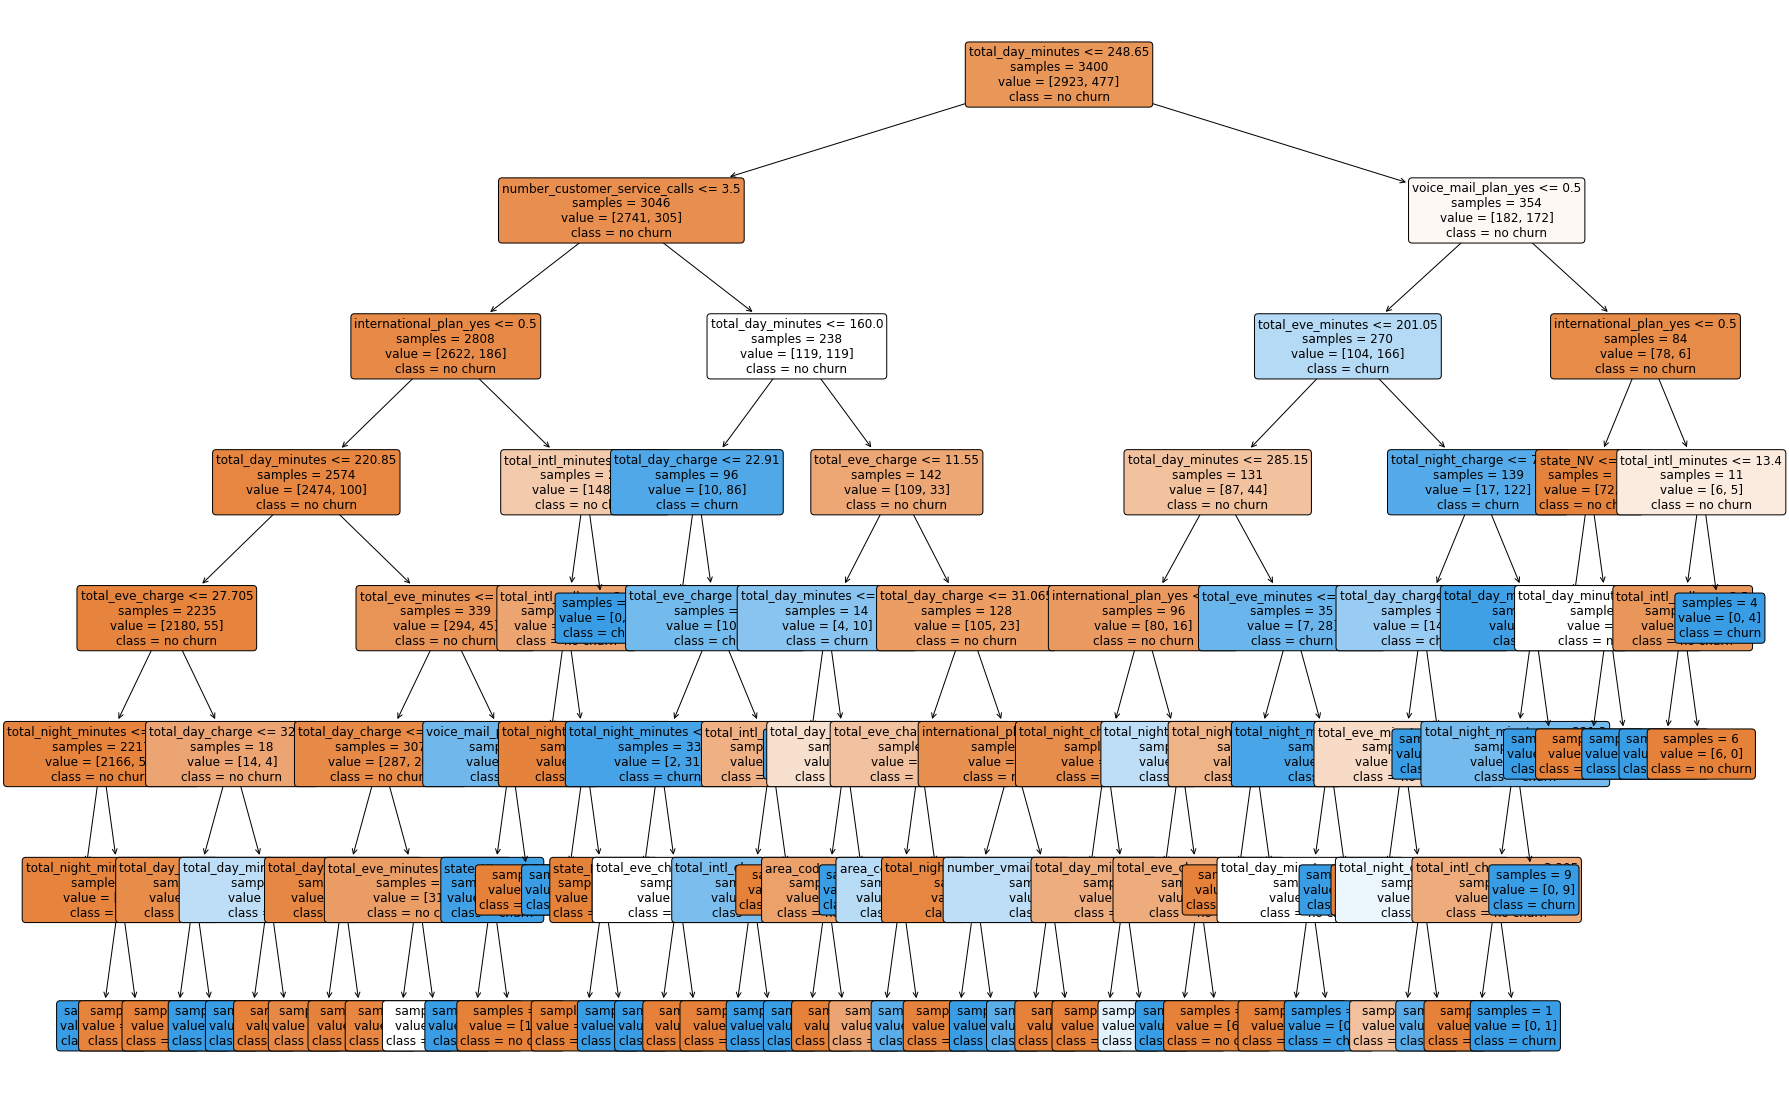

In [56]:
from sklearn.tree import plot_tree
# plot tree
fig, ax = plt.subplots(figsize=(30,20))

plot_tree(best_grid,
          feature_names=X_train.columns,
          class_names=["no churn", "churn"],
          rounded=True,
          impurity=False,
          filled=True,
          ax=ax,
          fontsize=12);

In [57]:
# esembles models

AB: 0.887353 (0.007897)
GBM: 0.955000 (0.007675)
RF: 0.943529 (0.011452)
XG: 0.953529 (0.009825)


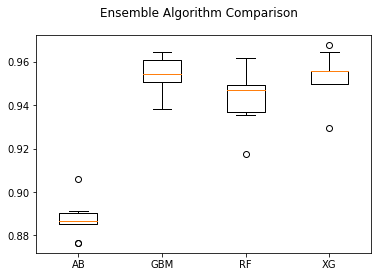

In [58]:

ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('XG', XGBClassifier()))
results = []
names = []

for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Compare Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show();

In [59]:
# Tunning Gradient Boosting
max_depth= [1, 3, 5, 7, 9, 15]
n_est = [20,40,60,80]
learning_rate= [0.01,0.1,1]
param_grid = dict(max_depth=max_depth, n_estimators =n_est, learning_rate = learning_rate)
model = GradientBoostingClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print(f'test score is :  {grid_result.score(X_test, y_test)}')
# test score is 0.96 after tunning max_depth and n_est and learning rate

Best: 0.956176 using {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 60}
test score is :  0.9611764705882353


In [60]:
best_grid = grid_result.best_estimator_
predictions2 = best_grid.predict(X_test)

In [61]:
confusion_matrix = metrics.confusion_matrix(y_test,predictions2)
print(metrics.classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       729
           1       0.94      0.78      0.85       121

    accuracy                           0.96       850
   macro avg       0.95      0.88      0.91       850
weighted avg       0.96      0.96      0.96       850



In [62]:
matrix = pd.DataFrame(confusion_matrix, columns = ["Pred 0", "Pred 1"], index = ["True 0", "True 1"])
matrix
# best model so far

,Pred 0,Pred 1
True 0,723,6
True 1,27,94


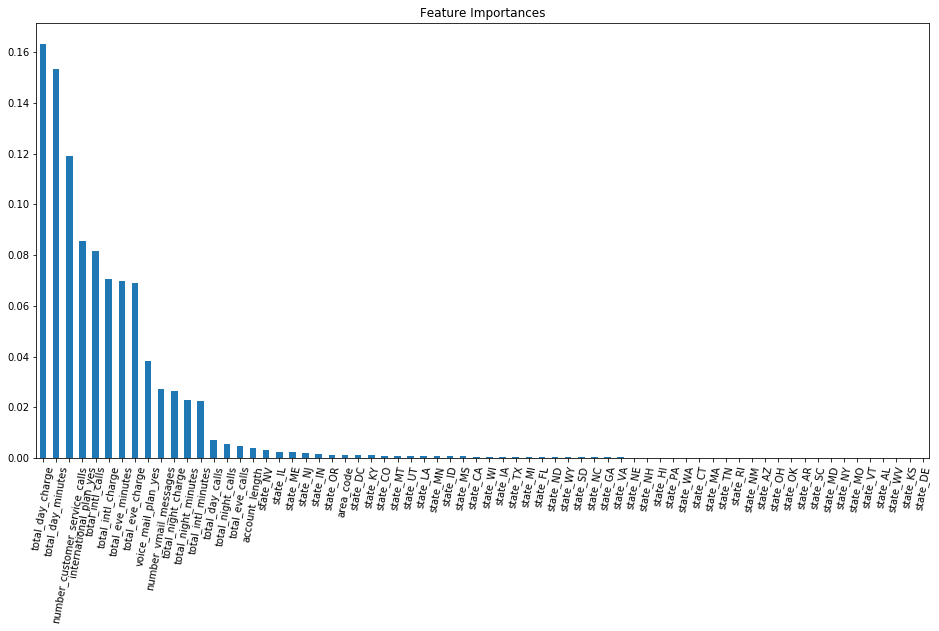

In [63]:
feat_imp = pd.Series(best_grid.feature_importances_, X_train.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances', figsize = (16.0,8.0))
#plt.ylabel('Feature Importance Score')
plt.xticks(rotation = 80)
plt.show()

In [64]:
# scaling the data for models

In [65]:
from sklearn.preprocessing import StandardScaler
my_scaler = StandardScaler()
X_train_scaled = my_scaler.fit_transform(X_train)
X_test_scaled = my_scaler.transform(X_test)

In [66]:
# Tunning Gradient Boosting scaled data
max_depth= [1, 3, 5, 7, 9, 15, 19, 21]
n_est = [20,40,60,80]
param_grid = dict(max_depth=max_depth, n_estimators =n_est)
model = GradientBoostingClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train_scaled, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print(f'test score is :  {grid_result.score(X_test_scaled, y_test)}')

Best: 0.956765 using {'max_depth': 5, 'n_estimators': 80}
test score is :  0.9588235294117647


In [67]:
# Neural Net

In [68]:
from tensorflow.keras import utils
from sklearn.preprocessing import LabelEncoder
#encode class values for neural net
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = utils.to_categorical(encoded_Y)

In [69]:
#encode class values for neural net
encoder.fit(y_test)
encoded_Y_test = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_test= utils.to_categorical(encoded_Y_test)

In [70]:
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [71]:
classifier = Sequential()
#Hidden Layers
classifier.add(Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]))
classifier.add(Dense(64, activation='relu'))
classifier.add(Dropout(0.3))
classifier.add(Dense(32, activation='relu'))
classifier.add(Dense(16, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(8, activation='relu'))
classifier.add(Dense(4, activation='relu'))
#Output Layer
classifier.add(Dense(2, activation='softmax'))
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [72]:
#Fitting the data to the training dataset
classifier_history =  classifier.fit(X_train_scaled,dummy_y, batch_size=2, epochs=20, validation_data=[X_test_scaled, dummy_y_test], verbose = 0)

Text(0, 0.5, 'Training Error')

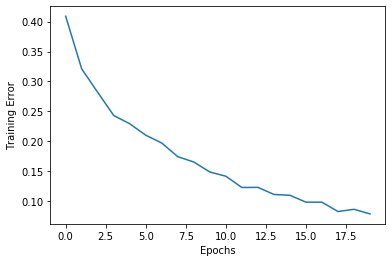

In [73]:
# Plot the loss function
plt.plot(classifier_history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

In [74]:
eval_model=classifier.evaluate(X_train_scaled, dummy_y)
eval_model

3400/3400 [==============================] - 0s 17us/step


[0.07002238849506659, 0.981764705882353]

In [75]:
eval_model=classifier.evaluate(X_test_scaled, dummy_y_test)
eval_model

850/850 [==============================] - 0s 19us/step


[0.3350796384671155, 0.9164705876743092]

In [76]:
y_predicted=classifier.predict(X_test_scaled)

In [77]:
y_predicted[1:10]

array([[8.82739961e-01, 1.17260024e-01],
       [9.94791031e-01, 5.20895794e-03],
       [8.72263134e-01, 1.27736852e-01],
       [9.96572971e-01, 3.42708384e-03],
       [9.91779387e-01, 8.22054781e-03],
       [4.61939991e-01, 5.38060009e-01],
       [9.98733222e-01, 1.26681430e-03],
       [9.99106586e-01, 8.93335731e-04],
       [8.87401581e-01, 1.12598412e-01]], dtype=float32)

In [78]:
# decoding the results from the NN model
def decode(results_nn):
    return np.argmax(results_nn)

In [79]:
y_decoded = []
for i in range(y_predicted.shape[0]):
    decoded_results = decode(y_predicted[i])
    y_decoded.append(decoded_results)

In [80]:
y_decoded[1:10]

[0, 0, 0, 0, 0, 1, 0, 0, 0]

In [81]:
y_predicted[1:10]

array([[8.82739961e-01, 1.17260024e-01],
       [9.94791031e-01, 5.20895794e-03],
       [8.72263134e-01, 1.27736852e-01],
       [9.96572971e-01, 3.42708384e-03],
       [9.91779387e-01, 8.22054781e-03],
       [4.61939991e-01, 5.38060009e-01],
       [9.98733222e-01, 1.26681430e-03],
       [9.99106586e-01, 8.93335731e-04],
       [8.87401581e-01, 1.12598412e-01]], dtype=float32)

In [82]:
confusion_matrix1 = metrics.confusion_matrix(y_test,y_decoded)

In [83]:
df_con_mat = pd.DataFrame(confusion_matrix1, columns = ['Predicted 0','Predicted 1'],
                 index = ['True 0','True 1'])

df_con_mat
# the NN is still not as great as Gradient Boosting

,Predicted 0,Predicted 1
True 0,709,20
True 1,51,70


## TEST SET

In [84]:
# Predicting test set unsing Gradient Boosting

In [85]:
test_churn = pd.read_csv("data/test.csv")

In [86]:
test_churn.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [87]:
# area code - replacing string area_code_ for nothing and converting into interger
test_churn["area_code"].unique()
test_churn["area_code"] = test_churn["area_code"].loc[:].str.replace("area_code_", "")
test_churn["area_code"] = test_churn["area_code"].astype("int")

In [88]:
# creating dummies for state, international plan and voice mail plan
test_model = pd.get_dummies(test_churn[["state", "international_plan", "voice_mail_plan"]],drop_first = True)

In [89]:
# concat churn and df_model
test_model = pd.concat([test_churn,test_model], axis = 1)

In [90]:
test_model.shape

(750, 72)

In [91]:
# droping object columns
col_drop = ["id","state", "international_plan","voice_mail_plan"]
for col in col_drop:
    test_model = test_model.drop(col, axis = 1)

In [92]:
test_model.shape

(750, 68)

- Gradient Boosting best parameters
Best: 0.956765 using {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 60}

In [93]:
model = GradientBoostingClassifier(
    max_depth=5,
    n_estimators=60,
    learning_rate=0.1
)
model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=60,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [94]:
model.score(X_test,y_test)

0.9541176470588235

In [95]:
predicted = model.predict(test_model)

In [96]:
final_test = pd.DataFrame({"ID": test_churn["id"], "predicted" : predicted})

In [97]:
final_test.to_csv("predicted.csv")